<a href="https://colab.research.google.com/github/T-mang/misc/blob/master/time_series_examples.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [138]:
import pandas as pd
%matplotlib inline
#https://data.world/data-society/global-climate-change-data
df = pd.read_csv('/content/GlobalLandTemperatures_GlobalTemperatures.csv')

In [139]:
df.head()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN


In [140]:
df.tail()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
3187,2015-08-01,14.755,0.072,20.699,0.110,9.005,0.170,17.589,0.057
3188,2015-09-01,12.999,0.079,18.845,0.088,7.199,0.229,17.049,0.058
3189,2015-10-01,10.801,0.102,16.450,0.059,5.232,0.115,16.290,0.062
3190,2015-11-01,7.433,0.119,12.892,0.093,2.157,0.106,15.252,0.063
3191,2015-12-01,5.518,0.100,10.725,0.154,0.287,0.099,14.774,0.062


In [141]:
df_temperatures = df[['dt','LandAverageTemperature']]

In [142]:
title = "Monthly Global Temperature:  Jan 1750 - Dec 2015"
print(len(df_temperatures))
print(df_temperatures.head())

3192
           dt  LandAverageTemperature
0  1750-01-01                   3.034
1  1750-02-01                   3.083
2  1750-03-01                   5.626
3  1750-04-01                   8.490
4  1750-05-01                  11.573


In [143]:
df_temperatures.dtypes

dt                         object
LandAverageTemperature    float64
dtype: object

In [144]:
df_temperatures.set_index('dt', inplace=True)

In [145]:
df_temperatures.head()

,LandAverageTemperature
dt,
1750-01-01,3.034
1750-02-01,3.083
1750-03-01,5.626
1750-04-01,8.490
1750-05-01,11.573


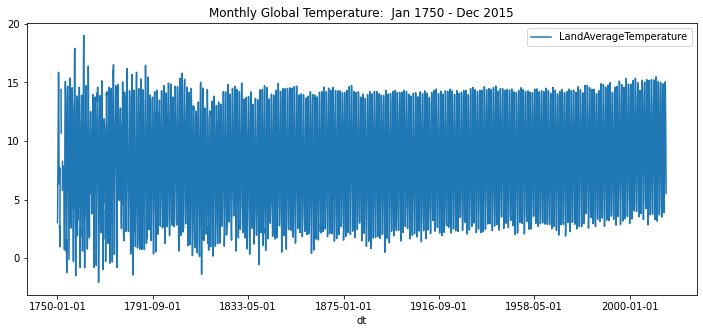

In [146]:
df_temperatures.plot(figsize=(12,5),title=title)

In [147]:
new_df = df.drop(['LandAverageTemperatureUncertainty','LandMaxTemperature',
            'LandMaxTemperatureUncertainty','LandMinTemperature','LandMinTemperatureUncertainty',
            'LandAndOceanAverageTemperature','LandAndOceanAverageTemperatureUncertainty'], axis=1)

In [148]:
new_df['dt']=pd.to_datetime(new_df['dt'])
new_df.dtypes

dt                        datetime64[ns]
LandAverageTemperature           float64
dtype: object

In [149]:
new_df.set_index('dt', inplace=True)

In [150]:
new_df.index

DatetimeIndex(['1750-01-01', '1750-02-01', '1750-03-01', '1750-04-01',
               '1750-05-01', '1750-06-01', '1750-07-01', '1750-08-01',
               '1750-09-01', '1750-10-01',
               ...
               '2015-03-01', '2015-04-01', '2015-05-01', '2015-06-01',
               '2015-07-01', '2015-08-01', '2015-09-01', '2015-10-01',
               '2015-11-01', '2015-12-01'],
              dtype='datetime64[ns]', name='dt', length=3192, freq=None)

In [151]:
len(new_df)

3192

In [154]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3192 entries, 1750-01-01 to 2015-12-01
Data columns (total 1 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   LandAverageTemperature  3180 non-null   float64
dtypes: float64(1)
memory usage: 49.9 KB


In [155]:
yearly_df = new_df.resample(rule='Y').mean()
yearly_df

,LandAverageTemperature
dt,
1750-12-31,8.719364
1751-12-31,7.976143
1752-12-31,5.779833
1753-12-31,8.388083
1754-12-31,8.469333
...,...
2011-12-31,9.516000
2012-12-31,9.507333
2013-12-31,9.606500


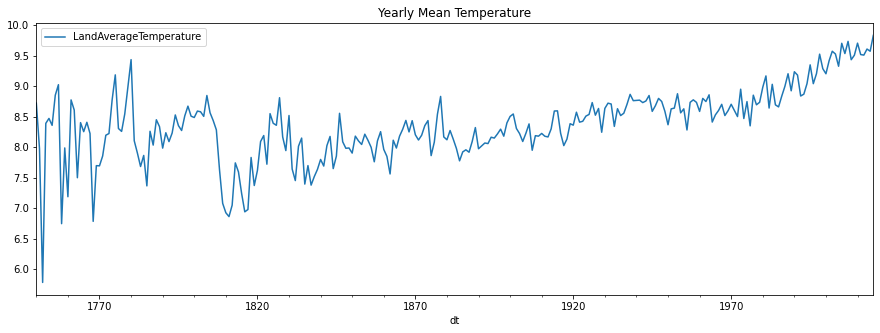

In [156]:
title = 'Yearly Mean Temperature'
yearly_df.plot(figsize=(15,5), title=title)

In [157]:
yearly_df['index1'] = yearly_df.index

In [158]:
yearly_df

,LandAverageTemperature,index1
dt,,
1750-12-31,8.719364,1750-12-31
1751-12-31,7.976143,1751-12-31
1752-12-31,5.779833,1752-12-31
1753-12-31,8.388083,1753-12-31
1754-12-31,8.469333,1754-12-31
...,...,...
2011-12-31,9.516000,2011-12-31
2012-12-31,9.507333,2012-12-31
2013-12-31,9.606500,2013-12-31


In [159]:
yearly_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 266 entries, 1750-12-31 to 2015-12-31
Freq: A-DEC
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   LandAverageTemperature  266 non-null    float64       
 1   index1                  266 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(1)
memory usage: 6.2 KB


In [160]:
yearly_df['year'] = yearly_df['index1'].dt.year

In [161]:
yearly_df['decade'] = (yearly_df['year'] //10 ) * 10

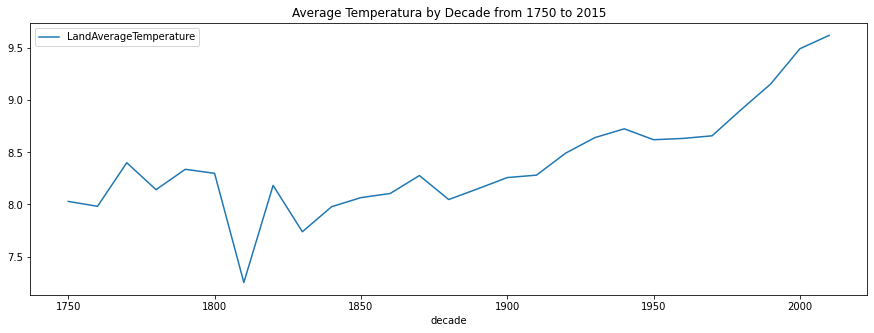

In [164]:
yearly_df1 = yearly_df.drop(['year'],axis=1)
title = 'Average Temperatura by Decade from 1750 to 2015'
yearly_df1.groupby(['decade']).mean().plot(title=title, figsize=(15,5));
